### Análise Exploratória 
Com dados de venda de um recorte de uma base fornecida pela Microsoft (AdventureWorks). 

--------------------------
Projeto ligado ao Bootcamp Engenheiro de Dados da Digital Innovation One

In [45]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Lendo o arquivo com os dados e armazenando em um Dataframe
df = pd.read_excel('AdventureWorks.xlsx')
df

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,330.99,999.0,6,419.58,5574.42,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
900,2008-10-04,2008-10-15,306,1155,19057,200810044CS636,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.0,6,1198.80,4795.20,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black


In [4]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [19]:
# Verificando a existência de valores faltantes
df.isna().any()

Data Venda        False
Data Envio        False
ID Loja           False
ID Produto        False
ID Cliente        False
No. Venda         False
Custo Unitário    False
Preço Unitário    False
Quantidade        False
Valor Desconto    False
Valor Venda       False
Produto           False
Fabricante        False
Marca             False
Classe            False
Cor               False
Custo Total       False
Tempo de Envio    False
dtype: bool

O nosso dataframe tem 904 linhas e 16 colunas de atributos, variando entre os tipos data, string, inteiro e float. Com nenhum valor faltante.

#### Qual foi a receita total? 

In [5]:
# Somamos a coluna valor venda 
venda = df["Valor Venda"].sum()

# Salvando o resultado em um novo df e melhorando a apresentação desse dado 
receita = pd.DataFrame({"Receita Total" : [venda]})

receita["Receita Total"] = receita["Receita Total"].map("$ {:,.2f}".format)

receita

,Receita Total
0,"$ 5,984,606.14"


#### Qual foi o custo total? 

In [6]:
# Temos que fazer a multiplicação da coluna custo unitário pela coluna quantidade para 
# obter o custo total de cada produto

df["Custo Total"] = df["Custo Unitário"].mul(df["Quantidade"])
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [7]:
# E agora somamos a nova coluna Custo Total:
custo = df["Custo Total"].sum()

# Salvando o resultado em um novo df e melhorando a apresentação desse dado 
custo_total = pd.DataFrame({"Custo Total" : [custo]})

custo_total["Custo Total"] = custo_total["Custo Total"].map("$ {:,.2f}".format)

custo_total

,Custo Total
0,"$ 2,486,783.05"


#### Qual foi o lucro? 

In [11]:
# Diminuindo os valores de Receita e Custo Total, obtemos o lucro total.
conta = venda - custo

# Armazenando o resultado e melhorando a apresentação
lucro = pd.DataFrame({"Lucro Obtido" : [conta]})
lucro["Lucro Obtido"] = lucro["Lucro Obtido"].map("$ {:,.2f}".format)

lucro

,Lucro Obtido
0,"$ 3,497,823.09"


#### Qual foi a média do tempo de envio de cada marca? 

In [28]:
# Primeiro criamos uma nova coluna que explicita o tempo de envio de cada produto
df["Tempo de Envio em Dias"] = (df["Data Envio"] - df["Data Venda"]).dt.days
# Extraindo apenas a informação númerica
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Tempo de Envio,Lucro,Tempo de Envio em Dias
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,20,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,5,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,6,2456.52,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,6,2456.52,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,7,2456.52,7


In [30]:
# Agora agrupando por marca e por média de tempo 
tempo_medio = df.groupby("Marca")["Tempo de Envio em Dias"].mean()
tempo_medio_df = pd.DataFrame(tempo_medio)
tempo_medio_df

,Tempo de Envio em Dias
Marca,
Adventure Works,8.663866
Contoso,8.470930
Fabrikam,8.510121


#### Qual o lucro por ano e por marca? 

In [26]:
# Crio uma nova coluna com lucro de cada produto: 
df["Lucro"] = (df["Valor Venda"] - df["Custo Total"])

# Uso essa coluna para calcular o lucro por marca e ano
lucro_am = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()


# Formatando os resultados 
lucro_am = lucro_am.map("$ {:,.2f}".format)

# Salvando em um novo df
lucro_am_df = pd.DataFrame(lucro_am)

lucro_am_df

Lucro
Data Venda Marca                          
2008       Adventure Works    $ 306,641.16
           Contoso             $ 56,416.00
           Fabrikam         $ 1,557,020.55
2009       Adventure Works    $ 405,395.08
           Contoso            $ 138,258.95
           Fabrikam         $ 1,034,091.35

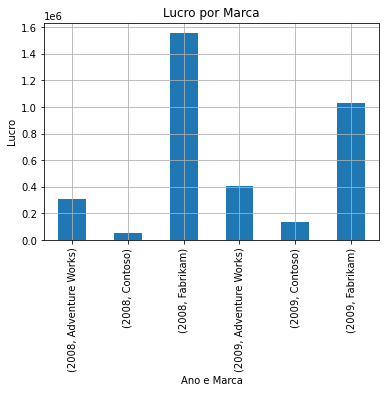

In [52]:
# Reunindo essas informações em um gráfico
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().plot.bar(title = "Lucro por Marca")
plt.grid(b=None, which='major', axis='both')
plt.xlabel("Ano e Marca")
plt.ylabel("Lucro")
plt.show()

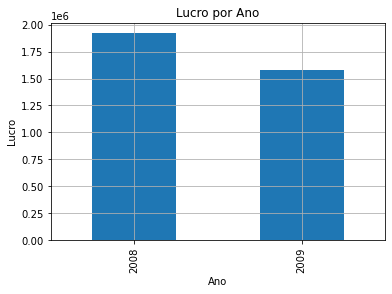

In [53]:
# Se quiser ver apenas lucro por ano
df.groupby([df["Data Venda"].dt.year])["Lucro"].sum().plot.bar(title = "Lucro por Ano")
plt.grid(b=None, which='major', axis='both')
plt.xlabel("Ano")
plt.ylabel("Lucro")
plt.show()

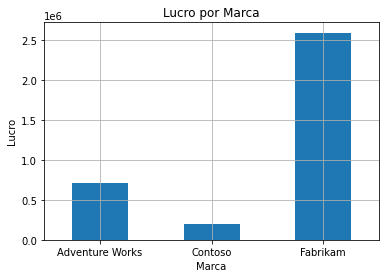

In [65]:
# Se quisermos apenas o lucro apenas por marca? 
df.groupby("Marca")["Lucro"].sum().plot.bar(title = "Lucro por Marca")
plt.grid(b=None, which='major', axis='both')
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation = "horizontal")
plt.show()

#### E se quisermos analisar o lucro por mês? 

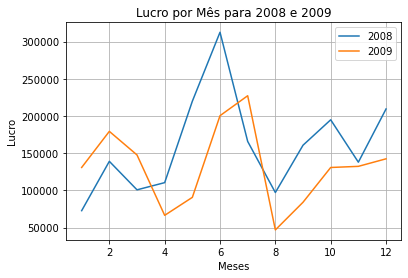

In [62]:
# Separando o df para os anos de 2008 e 2009 

df_2008 = df[df["Data Venda"].dt.year == 2008]
df_2009 = df[df["Data Venda"].dt.year == 2009]

# Plotando uma linha por ano
fig, ax = plt.subplots()
line1 = df_2008.groupby([df["Data Venda"].dt.month])["Lucro"].sum().plot(label = "2008")
line2 = df_2009.groupby([df["Data Venda"].dt.month])["Lucro"].sum().plot(label = "2009")
# Adicionando a legenda, grid e labels
ax.legend()
plt.title("Lucro por Mês para 2008 e 2009")
plt.grid(b=None, which='major', axis='both')
plt.xlabel("Meses")
plt.ylabel("Lucro")
plt.show()

#### Por fim o lucro por Classe

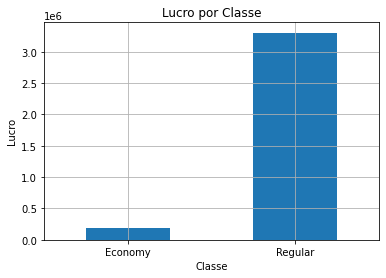

In [66]:
df.groupby("Classe")["Lucro"].sum().plot.bar(title = "Lucro por Classe")
plt.grid(b=None, which='major', axis='both')
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation = "horizontal")
plt.show()

#### Qual o total de produtos vendidos?

In [38]:
# Cálculo 
produtos = df.groupby("Produto")["Quantidade"].sum().sort_values()

# Salvando em um novo df 
produtos_df = pd.DataFrame(produtos)

produtos_df

,Quantidade
Produto,
Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
Adventure Works Laptop15.4W M1548 Red,1047
Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
Adventure Works Laptop15.4W M1548 Black,1089
Headphone Adapter for Contoso Phone E130 White,25008
Headphone Adapter for Contoso Phone E130 Silver,25232


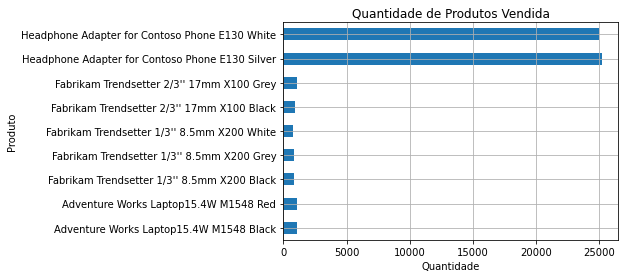

In [51]:
# Construindo um gráfico com esses valores 
plt.figure()
df.groupby("Produto")["Quantidade"].sum().plot.barh(title = "Quantidade de Produtos Vendida")
plt.grid(b=None, which='major', axis='both')
plt.xlabel("Quantidade")
plt.ylabel("Produto")
plt.show()

#### Análise Estatística do Tempo de Envio

In [67]:
df["Tempo de Envio em Dias"].describe()

count    904.000000
mean       8.543142
std        3.056920
min        4.000000
25%        6.000000
50%        9.000000
75%       11.000000
max       20.000000
Name: Tempo de Envio em Dias, dtype: float64

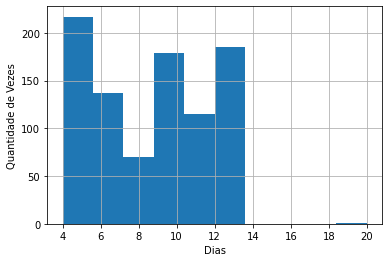

In [70]:
# Podemos plotar histogramas, boxplots, para nos ajudar a visualizar esses dados descritos acima. 
# Histograma 
plt.hist(df["Tempo de Envio em Dias"])
plt.grid(b=None, which='major', axis='both')
plt.xlabel("Dias")
plt.ylabel("Quantidade de Vezes")
plt.show()

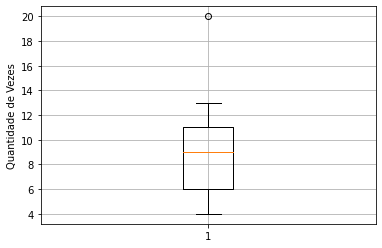

In [72]:
# Boxplot
plt.boxplot(df["Tempo de Envio em Dias"])
plt.grid(b=None, which='major', axis='both')
plt.ylabel("Quantidade de Vezes")
plt.show()

O gráfico boxplot mostra as estatísticas feitas com o método describe;
Com esses dois gráficos podemos notar a existência de um outlier em 20 dias de tempo de envio. 
Um outlier não necessariamente significa um valor errado, mas pode significar um problema no envio.